# EDA on Wine Quality Dataset

Dataset source: https://www.kaggle.com/yasserh/wine-quality-dataset

## Description:

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.

## Dataset dictionary:

* `volatile acidity` :   Volatile acidity is the gaseous acids present in wine. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste;
* `fixed acidity` :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic. Most acids involved with wine or fixed or nonvolatile;
* `residual sugar` :   Amount of sugar left after fermentation. The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet;
* `citric acid` :    It is weak organic acid, found in citrus fruits naturally. If found in small quantities, citric acid can add ‘freshness’ and flavor to wines;
* `chlorides` :   Amount of salt present in wine;
* `free sulfur dioxide` :   So2 is used for prevention of wine by oxidation and microbial spoilage. The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisul-fite ion; it prevents microbial growth and the oxidation of wine;
* `total sulfur dioxide`: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine;
* `pH` :   In wine pH is used for checking acidity.Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale;
* `density` : the density of water is close to that of water depending on the percent alcohol and sugar content;
* `sulphates` :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria. A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant;
* `alcohol` :   Percent of alcohol present in wine;
* `quality`:output variable (based on sensory data, score between 0 and 10);
* `id`.

## Personal motivation for picking this dataset:

I don't drink a lot, so when I do want to enjoy a glass of wine with my family or my friends, I want to be able to choose a good quality wine based on the wine's characteristics and type.


In [1]:
# Importing libraries and other necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing Dataframe object
wine_df = pd.read_csv("data/wine_quality.csv")

In [3]:
# quick look at the dataset
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# check the shape of the DataFrame
wine_df.shape

(1143, 13)

In [5]:
list(wine_df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

#### From above lines we can learn that there are total 1143 observations with 13 different feature variables/attributes present in the Wine Quality dataset.

In [6]:
# Now, let's check the information about different variables/column from the dataset:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


#### We can see that, all 13 columns are of numeric data types. Out of 13 variables, 11 are predictor variables,  'quality' column is an response variable and the last column is the ID of the wine, which we will drop later on because we don't need it.

In [7]:
# Let's look at the summary of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#### The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
* All the data seems to be in range (with different scales, which needs standardization).

## Cleaning data, visualization of data and future engineering

In [8]:
# check for missing values in the dataset
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### The wine quality dataset doesn't have any missing values/rows/cells for any of the variables/feature.
It seems that data has been collected neatly or prior cleaning has been performed before publishing the dataset.

In [11]:
# dropping the ID column, since we don't need it in our analysis
wine_df.drop('Id', inplace=True, axis=1)


In [12]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Learning more about the target/response variable/feature:

In [14]:
# Let's check how many unique values does the target feature 'quality' has and how data is distributed among those values?
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [16]:
wine_df.quality.value_counts().sort_index()

3      6
4     33
5    483
6    462
7    143
8     16
Name: quality, dtype: int64

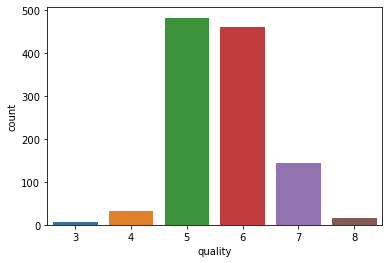

In [17]:
sns.countplot(x='quality', data=wine_df);

In [24]:
# Create a new categorical response variable/feature ('overall') from existing 'quality' variable
# Good   = [8,9]
# Medium = [5,6,7]
# Poor   = [3,4]

wine_df['overall'] = wine_df['quality'].apply(lambda x : 
                                                      'Poor' if x < 5 else 'Medium' if x < 8 else 'Good' )
wine_df.overall = wine_df.overall.astype('category')

In [19]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,overall
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [22]:
wine_df.groupby('overall').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
overall,,,,,,,,,,,,
Good,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,8.000000
Medium,8.318290,0.525988,0.269375,2.528722,0.086839,15.746783,46.437040,0.996744,3.309338,0.657307,10.429764,5.687500
Poor,7.907692,0.730385,0.172821,2.582051,0.096410,13.820513,38.128205,0.996825,3.386667,0.624359,10.173077,3.846154


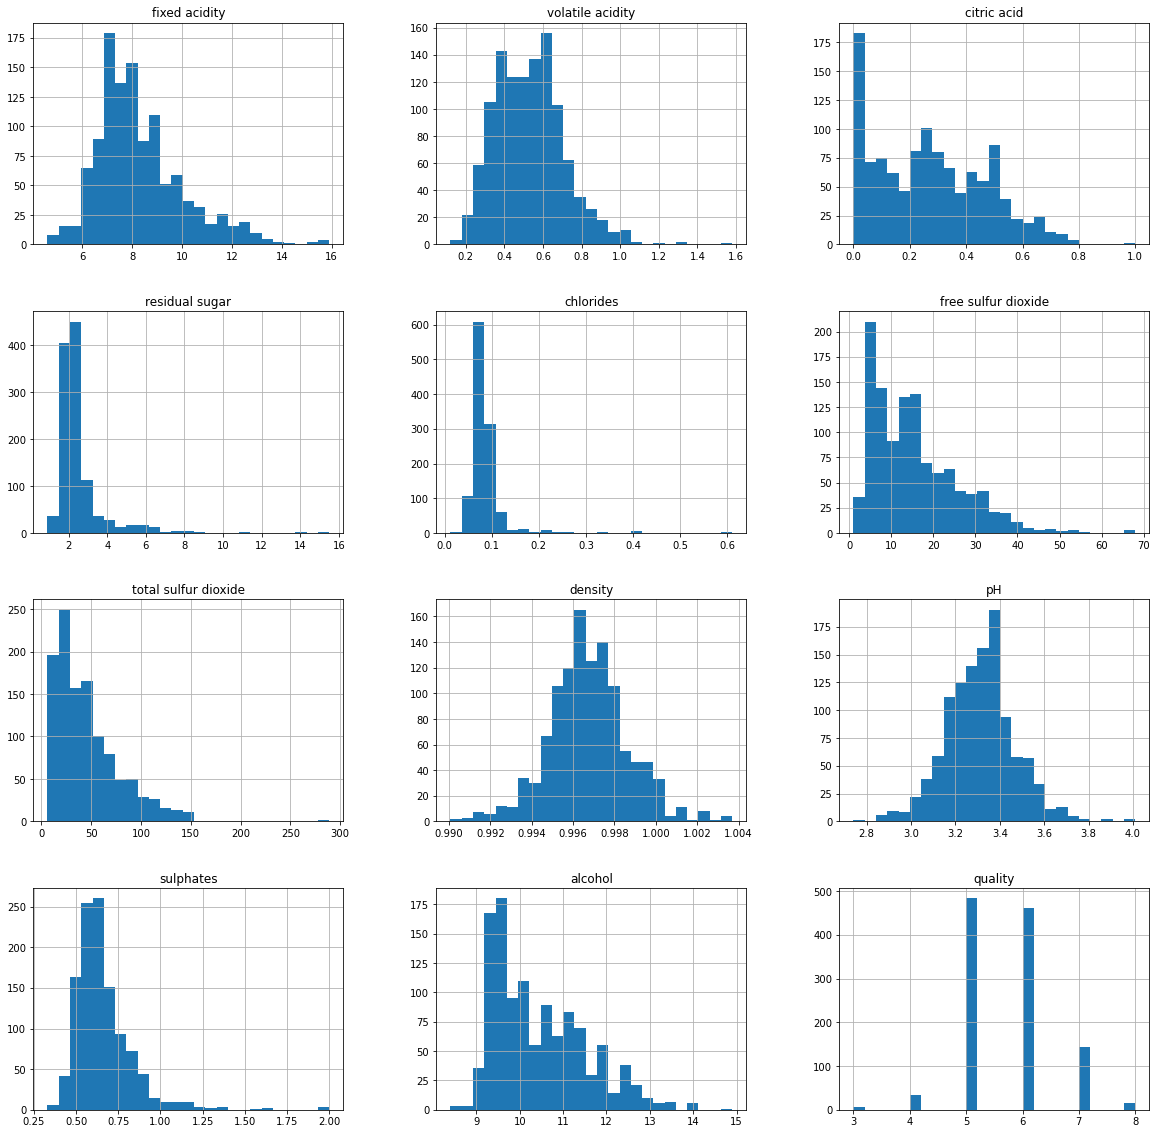

In [26]:
# Visualizatio of the dataset and the distribution of the variables
wine_df.hist(bins=25,figsize=(20,20))
# display histogram
plt.show()